### Read in the CSV files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display

col = ['playerID','G', 'AB', 'R','H', '2B', '3B', 'HR', 'RBI','SB', 'CS','BB','SO', 'IBB','HBP', 'SH', 'SF', 'GIDP']

batting = pd.read_csv('Batting.csv')
bat_df = pd.read_csv('Batting.csv', usecols=col)
players = pd.read_csv('People.csv')

display(batting.columns)

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

### Getting the overall totals of each column

In [2]:
bat_group = bat_df.groupby('playerID', sort=True).sum().reset_index()
bat_group.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,331,4,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0
1,aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0
2,aaronto01,437,944,102,216,42,6,13,94.0,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0
3,aasedo01,448,5,0,0,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
4,abadan01,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0


In [3]:
new_players = pd.merge(bat_group, players, on='playerID')
new_players.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,331,4,0,0,0,0,0,0.0,0.0,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,437,944,102,216,42,6,13,94.0,9.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,448,5,0,0,0,0,0,0.0,0.0,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,15,21,1,2,0,0,0,0.0,0.0,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


### Add calculated columns

In [4]:
# Using the f" to format
year = new_players['birthYear'].apply(lambda x: f'{x:.0f}')
month = new_players['birthMonth'].apply(lambda x: f'{x:.0f}')
day = new_players['birthDay'].apply(lambda x: f'{x:.0f}')
# Concate birth year, month, day
dob =  year + "-" + month + "-" + day
# Add column with birth info
new_players['DOB'] = dob

new_players['fullName'] = new_players['nameFirst'].astype(str) + " " + new_players['nameLast'].astype(str)

new_players.drop(['birthYear', 'birthMonth', 'birthDay', 'nameFirst', 'nameLast', 'retroID', 'bbrefID', 'nameGiven'], axis=1, inplace=True)
# Drop rows that have all 'na'
new_players.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,deathState,deathCity,weight,height,bats,throws,debut,finalGame,DOB,fullName
0,aardsda01,331,4,0,0,0,0,0,0.0,0.0,...,NaN,NaN,215.0,75.0,R,R,2004-04-06,2015-08-23,1981-12-27,David Aardsma
1,aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,...,NaN,NaN,180.0,72.0,R,R,1954-04-13,1976-10-03,1934-2-5,Hank Aaron
2,aaronto01,437,944,102,216,42,6,13,94.0,9.0,...,GA,Atlanta,190.0,75.0,R,R,1962-04-10,1971-09-26,1939-8-5,Tommie Aaron
3,aasedo01,448,5,0,0,0,0,0,0.0,0.0,...,NaN,NaN,190.0,75.0,R,R,1977-07-26,1990-10-03,1954-9-8,Don Aase
4,abadan01,15,21,1,2,0,0,0,0.0,0.0,...,NaN,NaN,184.0,73.0,L,L,2001-09-10,2006-04-13,1972-8-25,Andy Abad


### Show all the players that have played 50+ games and are still active

In [5]:
# Set the variable for the boolean mask
start_date = '2020-04-01'
min_games = 50

mask = (new_players['finalGame'] > start_date) & (new_players['G'] >= min_games)

active_players = new_players.loc[mask]
display(active_players.head())
display(active_players['playerID'].nunique())

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,deathState,deathCity,weight,height,bats,throws,debut,finalGame,DOB,fullName
36,abreujo02,901,3547,483,1038,218,14,179,611.0,10.0,...,NaN,NaN,250.0,75.0,R,R,2014-03-31,2020-08-08,1987-1-29,José Abreu
56,acunaro01,267,1059,205,302,48,6,67,165.0,53.0,...,NaN,NaN,205.0,72.0,R,R,2018-04-25,2020-08-08,1997-12-18,Ronald Acuna
60,adamewi01,237,819,112,215,32,1,30,86.0,10.0,...,NaN,NaN,210.0,72.0,R,R,2018-05-22,2020-08-08,1995-9-2,Willy Adames
85,adamsma01,818,2336,290,609,127,6,116,388.0,4.0,...,NaN,NaN,245.0,75.0,L,R,2012-05-20,2020-08-04,1988-8-31,Matt Adams
116,adriaeh01,422,990,133,246,56,7,16,111.0,17.0,...,NaN,NaN,195.0,73.0,B,R,2013-09-08,2020-08-08,1989-8-21,Ehire Adrianza


723

### Which active player had the most runs batted in (“RBI” from the Batting table) from 2015-2018?

In [6]:
years_to_examine = [2015, 2016, 2017, 2018]
batting_rbi = batting[['playerID', 'yearID', 'RBI', 'H', 'HR', 'G']]
batting_rbi = batting_rbi[batting['yearID'].isin(years_to_examine)]

batting_rbi = batting_rbi.groupby(['playerID'], as_index=False).sum()

most_rbi = batting_rbi[batting_rbi.RBI == batting_rbi.RBI.max()]

player_most_rbi = new_players.loc[new_players['playerID'] == 'arenano01']
display(player_most_rbi)

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,deathState,deathCity,weight,height,bats,throws,debut,finalGame,DOB,fullName
459,arenano01,1031,3936,626,1160,253,27,227,734.0,16.0,...,NaN,NaN,215.0,74.0,R,R,2013-04-28,2020-08-08,1991-4-16,Nolan Arenado


### How many double plays did Albert Pujols ground into in 2016

In [7]:
# Get playerID from full name
albert_pujols = new_players.loc[new_players['fullName'] == 'Albert Pujols']
display(albert_pujols['playerID'])
# Using playerID and yearID
gidp_mask = (batting['playerID'] == 'pujolal01') & (batting['yearID'] == 2016)

pujols_gidp = batting[['playerID', 'yearID', 'GIDP']]
pujols_gidp = pujols_gidp.loc[gidp_mask]

display(pujols_gidp)

14322    pujolal01
Name: playerID, dtype: object

,playerID,yearID,GIDP
102421,pujolal01,2016,24.0


### A histogram of triples (3B) per year

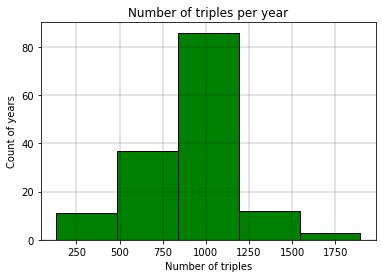

In [23]:
%matplotlib inline
batting['3B'] = pd.to_numeric(batting['3B'])
df_batting = batting[['playerID', 'yearID', '3B', 'SB']]
df_batting = df_batting.groupby('yearID').sum().reset_index()

_ = plt.hist(df_batting['3B'], bins=5, color='g', edgecolor='black')
_ = plt.title('Number of triples per year')
_ = plt.xlabel('Number of triples')
_ = plt.ylabel('Count of years')
_ = plt.grid(color='k', linewidth=0.2)
plt.show()